<a href="https://colab.research.google.com/github/AlexeyAKr/-ortfolio_-ython/blob/main/M09_Mistral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Загрузка данных из файла
file_path = 'seller_data.xlsx'
data = pd.read_excel(file_path)

# Исходные данные
subscription_cost = 3000  # стоимость подписки в месяц
avg_revenue_per_buyer = 2000  # средний доход с одного покупателя
avg_buyer_lifetime = 24  # средняя продолжительность взаимодействия для покупателей (в месяцах)
avg_seller_lifetime = 18  # средняя продолжительность взаимодействия для продавцов (в месяцах)

# Расчет метрик

# 1. Средний чек с каждой продажи
average_order_value = data['Order_Value'].mean()

# 2. Средняя комиссия с каждой продажи
average_commission = (data['Order_Value'] * data['Commission_Rate']).mean()

# 3. Средний доход продавца
# Учитываем доход от комиссий, продвижения и подписок
data['Total_Income'] = (
    data['Order_Value'] * data['Commission_Rate'] +
    data['Promotion_Income'] +
    (data['Subscription_Income'] * avg_seller_lifetime)
)
average_seller_income = data['Total_Income'].mean()

# 4. Процент продавцов, использующих платные инструменты продвижения
percent_using_promotion = data['Promotion_Used'].mean() * 100

# 5. Процент продавцов, использующих платную подписку
percent_using_subscription = data['Subscription'].mean() * 100

# Процентное соотношение средней комиссии к среднему чеку
percent_commission_to_average_check = (average_commission / average_order_value) * 100

# Процентное соотношение среднего дохода продавца к среднему чеку
percent_seller_income_to_average_check = (average_seller_income / average_order_value) * 100

# Вывод результатов
print(f"Средний чек с каждой продажи: {average_order_value:.2f} рублей")
print(f"Средняя комиссия с каждой продажи: {average_commission:.2f} рублей")
print(f"Средний доход продавца: {average_seller_income:.2f} рублей")
print(f"Процент продавцов, использующих платные инструменты продвижения: {percent_using_promotion:.1f}%")
print(f"Процент продавцов, использующих платную подписку: {percent_using_subscription:.1f}%")
print(f"Процентное соотношение средней комиссии к среднему чеку: {percent_commission_to_average_check:.2f}%")
print(f"Процентное соотношение среднего дохода продавца к среднему чеку: {percent_seller_income_to_average_check:.2f}%")

Средний чек с каждой продажи: 2009.67 рублей
Средняя комиссия с каждой продажи: 201.39 рублей
Средний доход продавца: 13487.39 рублей
Процент продавцов, использующих платные инструменты продвижения: 50.8%
Процент продавцов, использующих платную подписку: 19.9%
Процентное соотношение средней комиссии к среднему чеку: 10.02%
Процентное соотношение среднего дохода продавца к среднему чеку: 671.13%


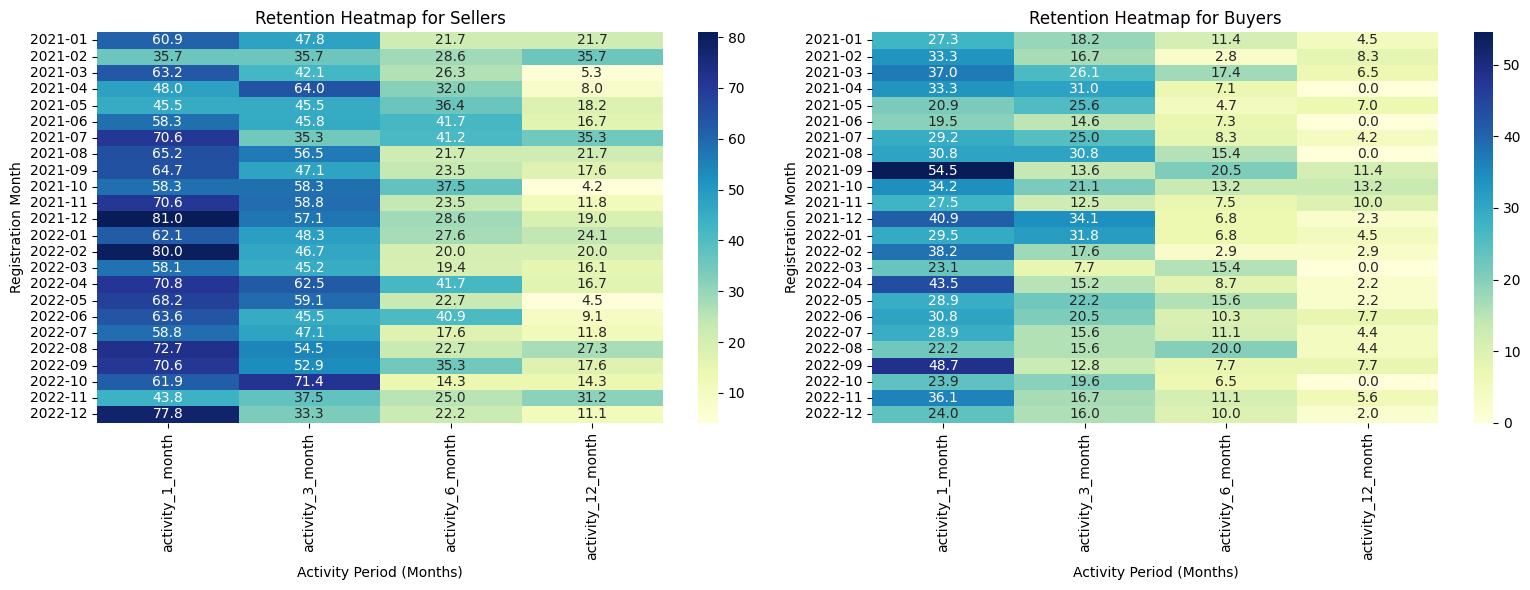

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файлов
file_path_sellers = 'sellers_cohort_analysis_data.csv'
file_path_buyers = 'cohort_analysis_data - cohort_analysis_data.csv'

sellers_data = pd.read_csv(file_path_sellers)
buyers_data = pd.read_csv(file_path_buyers)

# Функция для подготовки данных когортного анализа
def prepare_cohort_data(data):
    # Преобразование даты регистрации в формат года и месяца
    data['registration_month'] = pd.to_datetime(data['registration_date']).dt.to_period('M')

    # Группировка данных по месяцу регистрации и подсчет активных пользователей
    cohort_sizes = data.groupby('registration_month').size()

    # Подсчет активных пользователей для каждого периода
    activity_columns = ['activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
    cohort_activity = data.groupby('registration_month')[activity_columns].sum()

    # Расчет процентного удержания
    retention_matrix = cohort_activity.divide(cohort_sizes, axis=0) * 100

    return retention_matrix

# Подготовка данных для продавцов и покупателей
sellers_retention = prepare_cohort_data(sellers_data)
buyers_retention = prepare_cohort_data(buyers_data)

# Визуализация тепловой карты для продавцов и покупателей
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(sellers_retention, annot=True, fmt=".1f", cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Retention Heatmap for Sellers')
axes[0].set_ylabel('Registration Month')
axes[0].set_xlabel('Activity Period (Months)')

sns.heatmap(buyers_retention, annot=True, fmt=".1f", cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Retention Heatmap for Buyers')
axes[1].set_ylabel('Registration Month')
axes[1].set_xlabel('Activity Period (Months)')

plt.tight_layout()
plt.show()